In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных

In [2]:
vacs = pd.read_csv('../vacs_metrics.csv')
vacs.head()

,vacancy_id_conv,metric_full,emplpyer_id
0,1,5.250818,640
1,2,5.808587,5123
2,3,2.830297,3325
3,4,5.179469,3511
4,5,5.457955,6604


Таблица с метрикой-скор для каждой вакансии
1. vacancy_id_conv — идентификатор вакансии
2. metrics_full — метрика
3. emplpyer_id - компания, работодатель?

In [44]:
vacs.shape

(55500, 3)

In [5]:
vacs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   vacancy_id_conv  55500 non-null  int64  
 1   metric_full      55500 non-null  float64
 2   emplpyer_id      55500 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 MB


In [7]:
vacs.describe()

,vacancy_id_conv,metric_full,emplpyer_id
count,55500.000000,55500.000000,55500.000000
mean,28750.169694,4.393625,4994.316342
std,16711.462112,1.430828,2882.736532
min,1.000000,-2.259488,0.000000
25%,14281.750000,3.609140,2485.000000
50%,28660.500000,4.562120,4994.000000
75%,43149.250000,5.372227,7469.000000
max,58346.000000,8.949871,9999.000000


Отрицательные значения метрики?

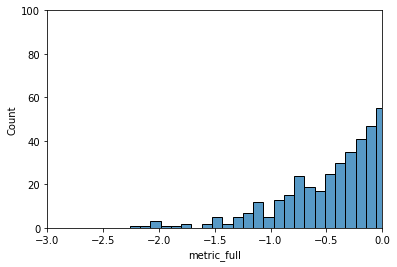

In [17]:
plt.xlim([-3, 0])
plt.ylim([0, 100])
sns.histplot(vacs.metric_full);

Многочислены, распределены более-менее "равномерно". Не похоже на баг. Фича?

In [21]:
vacs.nunique()

vacancy_id_conv    55500
metric_full        55500
emplpyer_id         9961
dtype: int64

Ни разу значение метрики не совпало. Поскольку округлений не было?  
~55 тыс.вакансий от ~10 тыс.работодателей

In [3]:
serps = pd.read_csv('../serps.csv')
serps.head()

,request_id,vacancy_id_conv,city,applicant
0,168719525526659303f2dee867dc6eda,48019,Moscow,78076
1,168719525526659303f2dee867dc6eda,45120,Moscow,614859
2,168719525526659303f2dee867dc6eda,18132,Moscow,175212
3,168719525526659303f2dee867dc6eda,29942,Moscow,322643
4,168719525526659303f2dee867dc6eda,32658,Moscow,722260


Таблица поисковых выдач
1. request_id — идентификатор serp’а
2. vacancy_id_conv  — идентификатор вакансии
3. city — город пользователя, в котором он ищет работу. Двусмысленно. Город, в котором ищет работу пользователь?
4. applicant - соискатель?

In [45]:
serps.shape

(2431596, 4)

In [6]:
serps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431596 entries, 0 to 2431595
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   request_id       object
 1   vacancy_id_conv  int64 
 2   city             object
 3   applicant        int64 
dtypes: int64(2), object(2)
memory usage: 74.2+ MB


In [18]:
serps.describe()

,vacancy_id_conv,applicant
count,2.431596e+06,2.431596e+06
mean,2.414411e+04,4.999815e+05
std,1.534930e+04,2.885768e+05
min,1.000000e+00,0.000000e+00
25%,1.171500e+04,2.501980e+05
50%,2.179800e+04,4.999010e+05
75%,3.592200e+04,7.497200e+05
max,5.834600e+04,9.999990e+05


In [19]:
serps.describe(include='object')

,request_id,city
count,2431596,2431596
unique,1000000,5
top,1687172902251a1750dec6b693a56090,Moscow
freq,50,785767


In [20]:
serps.nunique()

request_id         1000000
vacancy_id_conv      55500
city                     5
applicant           911862
dtype: int64

1 млн разных наборов выдачи?  
~55 тыс вакансий  
Из 5 городов  
От ~900 тыс соискателей  

In [4]:
request_ids = serps.request_id.unique()

In [39]:
cnt = 0
for i in range(500):
    df = serps[serps.request_id == np.random.choice(request_ids)]
    if not df.applicant.nunique() == df.shape[0]:
        cnt += 1
cnt

0

In [8]:
request_ids.shape

(1000000,)

Набор объявлений показывается одному пользователю только один раз? Ни разу не показали второй раз? Как же это устроено?

## Одномерный анализ

In [47]:
vacs.isnull().sum()

vacancy_id_conv    0
metric_full        0
emplpyer_id        0
dtype: int64

In [48]:
vacs[vacs.duplicated()]

,vacancy_id_conv,metric_full,emplpyer_id


In [49]:
vacs.vacancy_id_conv.describe()

count    55500.000000
mean     28750.169694
std      16711.462112
min          1.000000
25%      14281.750000
50%      28660.500000
75%      43149.250000
max      58346.000000
Name: vacancy_id_conv, dtype: float64

In [51]:
vacs.vacancy_id_conv.nunique()

55500

Все vacancy_id_conv уникальны. Но не все между 1 и 58346 существуют

In [52]:
vacs.emplpyer_id.describe()

count    55500.000000
mean      4994.316342
std       2882.736532
min          0.000000
25%       2485.000000
50%       4994.000000
75%       7469.000000
max       9999.000000
Name: emplpyer_id, dtype: float64

In [53]:
vacs.emplpyer_id.nunique()

9961

Не все emplpyer_id между 1 и 9999 существуют

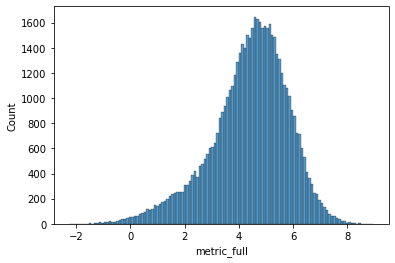

In [54]:
sns.histplot(vacs.metric_full);

In [55]:
vacs.metric_full.mean(), vacs.metric_full.median()

(4.393625295094181, 4.562120268028568)

Хвост слева тяжелее. Отрицательные значения "выглядят естественно", хотя что это могло бы значить - непонятно

In [6]:
serps.isnull().sum()

request_id         0
vacancy_id_conv    0
city               0
applicant          0
dtype: int64

In [7]:
serps[serps.duplicated()]

,request_id,vacancy_id_conv,city,applicant


In [10]:
serps.applicant.min(), serps.applicant.max()

(0, 999999)

In [11]:
serps.applicant.nunique()

911862

Не все applicant между 0 и 999 999 существуют

In [8]:
set(vacs.vacancy_id_conv.to_list()) == set(serps.vacancy_id_conv.to_list())

True

Идеально: лишних или нехватающих айдишников объявлений в обеих таблицах нет

In [4]:
serps.city = serps.city.astype('category')

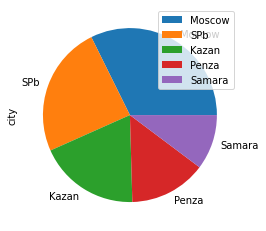

In [10]:
serps.city.value_counts().plot.pie(legend=True);

In [12]:
serps.city.value_counts()

Moscow    785767
SPb       592298
Kazan     456466
Penza     347974
Samara    249091
Name: city, dtype: int64

In [17]:
serps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431596 entries, 0 to 2431595
Data columns (total 4 columns):
 #   Column           Dtype   
---  ------           -----   
 0   request_id       object  
 1   vacancy_id_conv  int64   
 2   city             category
 3   applicant        int64   
dtypes: category(1), int64(2), object(1)
memory usage: 58.0+ MB


In [38]:
request_id_freq = serps.groupby('request_id').count().vacancy_id_conv.value_counts(normalize=True)
request_id_freq.head(10)

1     0.445046
2     0.242665
3     0.131103
4     0.069280
5     0.038471
6     0.022304
7     0.014474
8     0.010065
9     0.006957
10    0.005039
Name: vacancy_id_conv, dtype: float64

In [46]:
request_id_freq[11:].sum()

0.010991

In [45]:
request_id_freq.index.max()

50

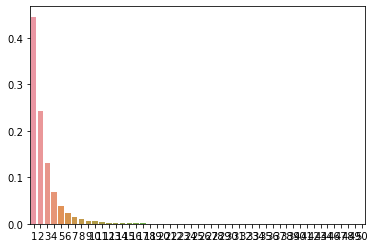

In [54]:
sns.barplot(y=request_id_freq.values, x=request_id_freq.index);

Один request_id срабатывает почти в половине случаев лишь раз? Чаще 10 раз лишь 1% request_id показываются. Хотя есть рекордсмен и на 50 показов.

In [21]:
vacancy_id_conv_freq = serps.groupby('vacancy_id_conv').count().city.value_counts(normalize=True)
vacancy_id_conv_freq.head(10)

1     0.052468
2     0.048829
3     0.045261
4     0.042414
5     0.038685
6     0.038360
7     0.034901
8     0.032523
9     0.030360
10    0.029297
Name: city, dtype: float64

In [23]:
vacancy_id_conv_freq.index.max()

22899

In [30]:
vacancy_id_conv_freq[100:].sum()

0.08717117117117118

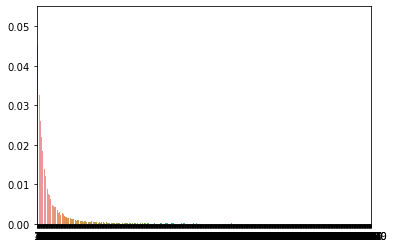

In [22]:
sns.barplot(y=vacancy_id_conv_freq.values, x=vacancy_id_conv_freq.index);

Вакансии по количеству реакций сильно отличаются. Около 9% реакций приходится на вакансии, на которые откликались не менее 100 раз. Максимум откликов - 22899

In [31]:
applicant_freq = serps.groupby('applicant').count().vacancy_id_conv.value_counts(normalize=True)
applicant_freq.head(10)

2     0.284664
1     0.234172
3     0.231037
4     0.140639
5     0.068377
6     0.027514
7     0.009629
8     0.002931
9     0.000802
10    0.000179
Name: vacancy_id_conv, dtype: float64

In [37]:
applicant_freq[6:].sum()

0.01359745224606355

In [35]:
applicant_freq.index.max()

12

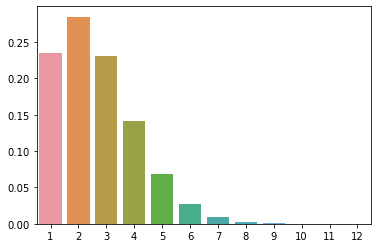

In [36]:
sns.barplot(y=applicant_freq.values, x=applicant_freq.index);

Соискатели по количеству реакций отличаются несильно. Может это данные за небольшое время? Всего полтора процента реакций приходится на соискателей, откликнувшихся более 5 раз. Максимум реакций - 12.

In [ ]:
serps.vacancy_id_conv.value_counts()

In [5]:
serps.head()

,request_id,vacancy_id_conv,city,applicant
0,168719525526659303f2dee867dc6eda,48019,Moscow,78076
1,168719525526659303f2dee867dc6eda,45120,Moscow,614859
2,168719525526659303f2dee867dc6eda,18132,Moscow,175212
3,168719525526659303f2dee867dc6eda,29942,Moscow,322643
4,168719525526659303f2dee867dc6eda,32658,Moscow,722260


In [42]:
vacs.head()

,vacancy_id_conv,metric_full,emplpyer_id
0,1,5.250818,640
1,2,5.808587,5123
2,3,2.830297,3325
3,4,5.179469,3511
4,5,5.457955,6604


На любом этапе прикидывать реалистичность данных.  
На любом этапе очищать данные от обнаруженных неточностей, несоответствий.  

Готовые "библиотеки" для анализа  
!pip install pandas_profiling --upgrade  
from pandas_profiling import ProfileReport  
profile = ProfileReport(df)  
profile

-----
- Предварительный просмотр данных
  - df.sample(5)
- Переименование полей
  - df.columns = df.columns.str.lower().str.replace(' ',  '\_')
- Общее количество записей и типы столбцов
  - df.shape, 
  - df.info()
- Проверить любые нулевые значения
  - df.isnull().sum(), 
  - df.isnull().sum() / df.shape[0]
- Удалить ненужные колонки
  - из df.columns скопировать названия во внутрь df[[]] и убирать колонки, переходя на новую строку и "комментируя" названия колонок. Чтобы можно было переиграть если что
- Проверить дубликаты записей
  - df[df.duplicated()].shape[0], 
  - df[df.duplicated()].shape[0] / df.shape[0], 
  - df.drop_duplicates(subset=None, keep=’first’, inplace=False)
- Преобразование типов данных
  - df.describe(include='object'),
  - время df.pickup = pd.to_datetime(df.pickup),
  - категориальные типы данных (при небольшом количестве значений?)  
    for col in ('color', 'payment', 'pickup_borough', 'dropoff_borough'):
    df[col] = df[col].astype('category')
- ВременнЫе границы, пропущенные периоды
  - df.dates.min(), df.dates.max(),
  - df.dates.dt.to_period("M").nunique() - количеством имеющихся периодов,
  - барплот "периоды - количество строк" sns.countplot(df.dates.dt.to_period("M"))

-----
##### Одномерный анализ
- Посмотреть временные ряды числовых данных (средние?) (по дням, месяцам и годам?). Тенденции, периодичность.
- Гистограмма распределения числовых данных. Посмотреть выбросы
- Гистограмма распределения числовых данных, в разрезе по различным категориям (пол, тип оплаты...). 
  Если категория две, то скрипки, если больше, то полупрозрачные гистограммы (или kde)?
- Распределение количества данных по категориальным данным sns.histplot(data=df, x='city_category'); или plt.pie(df.gender.value_counts(), labels=['M', 'F'])

-----
##### Двумерный анализ  
- Функции распределения цели по пользователям/товарам... purchase_by_user = df.groupby('user_id')['purchase'].sum(); sns.ecdfplot(purchase_by_user.values);  
- Гистограммы распределения числовых данных - парное совместное распределение.  
- Диаграммы Параметры категориальные - цель (цель может быть "разной"? Сумма продаж на категорию, средняя сумма продаж на покупателя из категории, средний чек, среднее количество покупок на покупателя в категории...).  
- Двумерные диаграммы. Скаттерплоты + линии регрессии, барплоты "категориальные - числовые". На скаттерплоте категории цветом вывести. Удобнее такое смотреть в BI-системе?  
- Сводные таблицы "Категория - Категория - Числовые данные (цель?)". FasetGrid?
- Pairplot для числовых данных sns.pairplot(df)  
- Корреляционные матрицы df.corr().style.background_gradient(cmap='crest'). С версии 1.5.0 можно не только для числовых столбиков  

-----
- Удалить выбросы? заполнить недостающие значения? Или это уже для ML?  
```python
q_1, q_3 = np.nanpercentile(df.A, [25, 75])
up_thresh = q_3 + 1.5 * diff_3_1
low_thresh = q_1 - 1.5 * diff_3_1
df.A[(df.A > low_thresh) * (df.A < up_thresh)]
```  

-----
- Присоединить новые данные (погода, курсы валют, индексы деловой активности)

-----
Самые важные признаки:
```python
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df[['Возраст', 'Длительность', 'Кампания', 'День', 'Предыдущий контакт', 'Индекс потребительских цен', 'Европейская межбанковская ставка', 'Количество сотрудников в компании']]
y = df.iloc[:, -1]
bestfeatures = SelectKBest(score_func = chi2, k = 'all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs', 'Score']  
print(featureScores.nlargest(10, 'Score')) 
```